<a href="https://colab.research.google.com/github/nakul8820/Machine_Learning/blob/main/EDA_ML_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ddosad/datacamps-data-science-associate-certification")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'datacamps-data-science-associate-certification' dataset.
Path to dataset files: /kaggle/input/datacamps-data-science-associate-certification


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams


In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC

#ABOUT THE DATASET
GoalZone is a fitness club chain in Canada. GoalZone offers a range of fitness classes in two capacities - 25 and 15. Some classes are always fully booked. Fully booked classes often have a low attendance rate. GoalZone wants to increase the number of spaces available for classes. They want to do this by predicting whether the member will attend the class or not. If they can predict a member will not attend the class, they can make another space available.

In [6]:
dataset = pd.read_csv('/kaggle/input/datacamps-data-science-associate-certification/fitness_class_2212.csv')
dataset.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [19]:
print("Numeric Summary")
dataset.describe()
print("Info")
dataset.info() #No Null value in the dataset
dataset.duplicated().sum() #no duplicated rows found

Numeric Summary
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


np.int64(0)

In [23]:
#To find how many people attended l
display(dataset['attended'].value_counts())

,count
attended,
0,1046
1,454


#so only 454 person attended
#lets analyze the trend of attended people separately

time
AM    360
PM     94
Name: count, dtype: int64
Percentage of People Who chose AM Time :79.295
Percentage of People Who chose PM Time :20.705


Text(0, 0.5, 'No. Of Attendees')

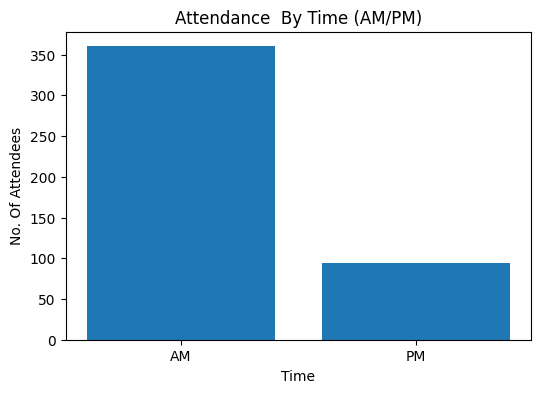

In [77]:
attended_dataset = dataset[dataset['attended']==1].copy().reset_index(drop=True)
attended_dataset.head()

#For AM and PM

attend_time = attended_dataset['time'].value_counts()
print(attend_time)
#Insight : most of people who attended
print(f"Percentage of People Who chose AM Time :{round(attend_time['AM'] * 100 / len(attended_dataset),3)}")
print(f"Percentage of People Who chose PM Time :{round(attend_time['PM'] * 100 / len(attended_dataset),3)}")

plt.figure(figsize=(6,4))
plt.bar(attend_time.index,attend_time.values)
plt.title('Attendance  By Time (AM/PM)')
plt.xlabel('Time')
plt.ylabel('No. Of Attendees')

,count
months_as_member,
12,23
20,23
16,21
13,20
18,18
19,17
14,17
22,17
21,16


months_as_member
29    12
11    13
25    13
17    14
27    14
24    15
21    16
14    17
22    17
19    17
18    18
13    20
16    21
12    23
20    23
Name: count, dtype: int64
Total count of top 15 months_as_member: 253


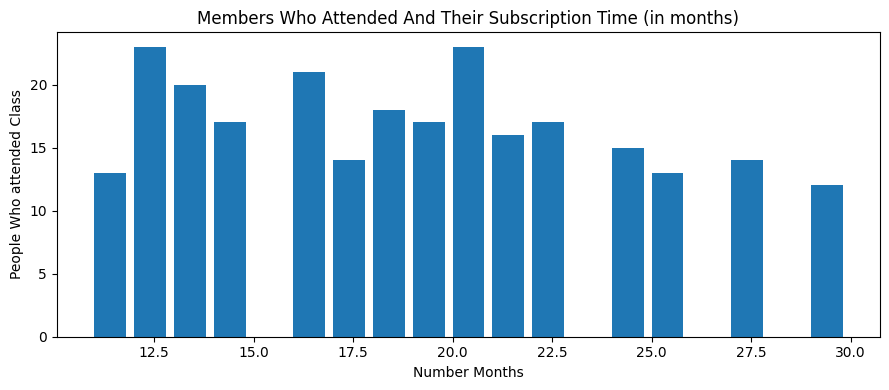

In [68]:
#lets analyze if attended people were new subscriber or the old
#top 15
display(attended_dataset['months_as_member'].value_counts().nlargest(15))
#creating seperate top 15 (months membership)
sum_top15 = attended_dataset['months_as_member'].value_counts().nlargest(15).copy()
print(sum_top15.sort_values())
print(f"Total count of top 15 months_as_member: {sum_top15.sum()}")



#plot them

plt.figure(figsize=(9,4))
plt.bar(sum_top15.index , sum_top15.values , align='edge')
plt.title('Members Who Attended And Their Subscription Time (in months)')
plt.xlabel('Number Months')
plt.ylabel('People Who attended Class')
plt.tight_layout()
plt.show()

In [84]:
attended_dataset.head()

# we will analyze based on day of week and category

print(attended_dataset['category'].value_counts())
print(attended_dataset['day_of_week'].value_counts())
#we have redundancy in data for day_of_week
# Standardize 'day_of_week' entries
day_mapping = {
    'Mon': 'Monday',
    'Monday': 'Monday',
    'Tue': 'Tuesday',
    'Wed': 'Wednesday',
    'Wednesday': 'Wednesday',
    'Thu': 'Thursday',
    'Fri': 'Friday',
    'Fri.': 'Friday',
    'Sat': 'Saturday',
    'Sun': 'Sunday'
}
attended_dataset['day_of_week'] = attended_dataset['day_of_week'].replace(day_mapping)

print(attended_dataset['day_of_week'].value_counts())

#plotting
plt.figure(figsize=(12,10))
plt.subplot(112)


category
HIIT        213
Cycling     110
Strength     62
Yoga         42
Aqua         25
-             2
Name: count, dtype: int64
day_of_week
Fri          82
Thu          78
Sun          71
Sat          63
Mon          62
Tue          59
Wednesday    13
Fri.         12
Wed          11
Monday        3
Name: count, dtype: int64
day_of_week
Friday       94
Thursday     78
Sunday       71
Monday       65
Saturday     63
Tuesday      59
Wednesday    24
Name: count, dtype: int64


<BarContainer object of 6 artists>

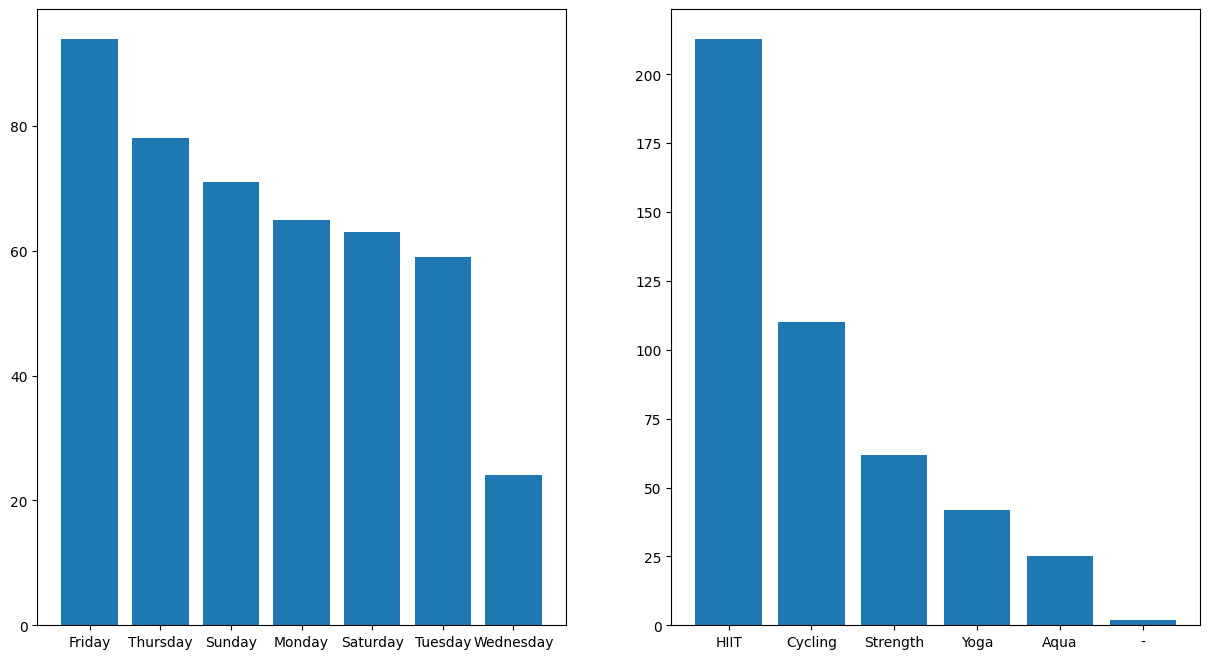

In [94]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.bar(attended_dataset['day_of_week'].value_counts().index , attended_dataset['day_of_week'].value_counts().values)
plt.subplot(122)
plt.bar(attended_dataset['category'].value_counts().index , attended_dataset['category'].value_counts().values)

#This is multi dimension data which can be predicted through svm. let's try it

#first we need to normalize the day of week in original dataset then we have to encode the label and drop column  days_before(The number of days before the class the member registered,) which seems to be not making any contribution in decision

In [95]:
day_mapping = {
    'Mon': 'Monday',
    'Monday': 'Monday',
    'Tue': 'Tuesday',
    'Wed': 'Wednesday',
    'Wednesday': 'Wednesday',
    'Thu': 'Thursday',
    'Fri': 'Friday',
    'Fri.': 'Friday',
    'Sat': 'Saturday',
    'Sun': 'Sunday'
}

dataset['day_of_week'] = dataset['day_of_week'].replace(day_mapping)


In [102]:
label_encoder = LabelEncoder()

dataset['day_of_week'] = label_encoder.fit_transform(dataset['day_of_week'])
dataset['time'] = label_encoder.fit_transform(dataset['time'])
dataset['category'] = label_encoder.fit_transform(dataset['category'])

We also need to scale the columns so their values range from [0,1]

In [119]:
standard_scaler = StandardScaler()

dataset['weight'].isna().sum()

dataset['weight'].fillna(dataset['weight'].mean() , inplace=True)
dataset['weight'] = standard_scaler.fit_transform(dataset[['weight']])

dataset['category'].isna().sum()
dataset['category'] = standard_scaler.fit_transform(dataset[['category']])

dataset['day_of_week'] = standard_scaler.fit_transform(dataset[['day_of_week']])
dataset['months_as_member'] = standard_scaler.fit_transform(dataset[['months_as_member']])


dataset = dataset.drop('days_before',axis=1)
dataset.head()

/tmp/ipython-input-3127731514.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['weight'].fillna(dataset['weight'].mean() , inplace=True)


,months_as_member,weight,day_of_week,time,category,attended
0,0.106122,-0.240639,1.743829,1,1.020045,0
1,-0.435580,-0.284027,-0.823646,0,0.041741,0
2,0.028736,-0.637446,0.203344,0,1.020045,0
3,-0.822510,0.276867,-1.337141,0,-0.936563,0
4,-0.048650,-1.050819,0.716839,0,0.041741,0


TRAIN AND TEST SPLIT & TARGET VALUE SEPARATION

In [121]:
y = dataset['attended']
x = dataset.drop(['attended'],axis=1)

In [122]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.33, random_state = 3)

In [123]:
svc_score = []
kernels = ['linear','poly','rbf','sigmoid']

for i in range(len(kernels)):
    svc_classifier = SVC(kernel=kernels[i])
    svc_classifier.fit(x_train , y_train)
    svc_score.append(svc_classifier.score(x_test,y_test))

Text(0.5, 1.0, 'Support vector machine classification')

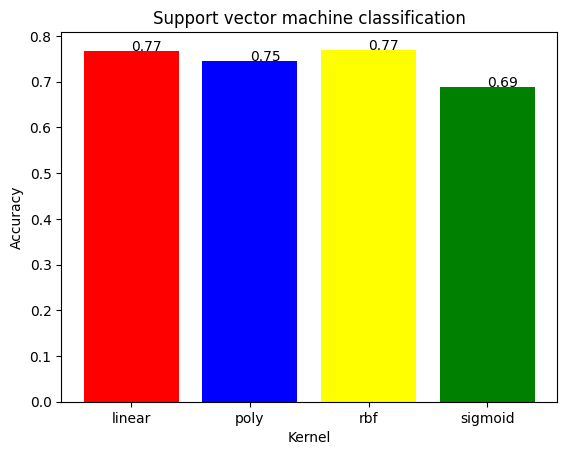

In [131]:
plt.bar(kernels, svc_score , color = ['red','blue','yellow','green'])
for i in range(len(kernels)):
    plt.text(i,svc_score[i],round(svc_score[i],2))
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title("Support vector machine classification")

#Lets Try Random forest and decision tree

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# we have total five feature so we will use 1,3,5 feature to find accuracy

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

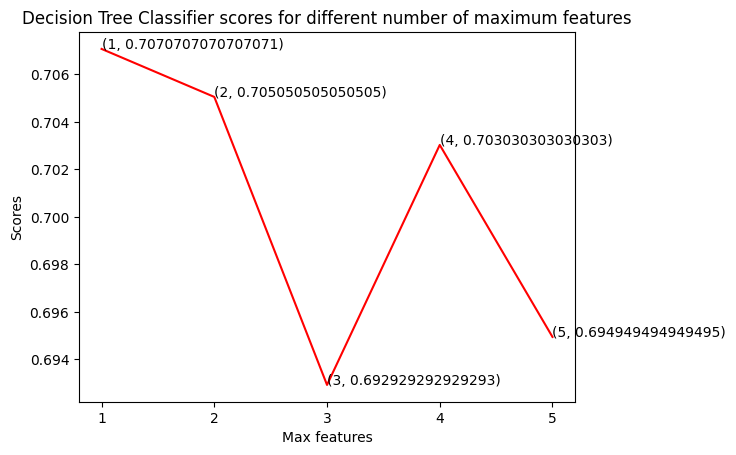

In [145]:
#DecisionTreeClassifier

max_features = 5 #total columns of dataset
dtc_score = []
for i in range(1,max_features+1):
    dtc = DecisionTreeClassifier()
    dtc.fit(x_train , y_train)
    dtc_score.append(dtc.score(x_test , y_test))

plt.plot([i for i in range(1,max_features+1)] , dtc_score , color ='red')
for i in range(1, max_features + 1):
    plt.text(i, dtc_score[i-1], (i, dtc_score[i-1]))
plt.xticks([i for i in range(1, max_features+ 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [ ]:
#Try Re-Running above cell accuracy fluctuates which means model is not able to
#generalize at all

#Random Forest Classifier(Well Suited  non-linear data )

In [146]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 423 to 1273
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   months_as_member  1005 non-null   float64
 1   weight            1005 non-null   float64
 2   day_of_week       1005 non-null   float64
 3   time              1005 non-null   int64  
 4   category          1005 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 47.1 KB


In [147]:
rfc_score = []

estimator = [10,100,400,500 , 800] #random feature selection to build tree

for i in estimator:
    rfc = RandomForestClassifier(n_estimators=i , random_state=4)
    rfc.fit(x_train , y_train)
    rfc_score.append(rfc.score(x_test , y_test))

Text(0, 0.5, 'Accuracy')

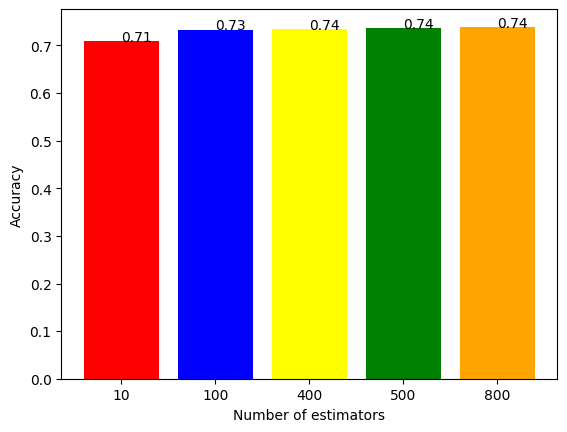

In [155]:
plt.bar([i for i in range(len(estimator))] , rfc_score , color = ['red','blue','yellow','green','orange'] )
for i in range(len(estimator)):
    plt.text(i,rfc_score[i],round(rfc_score[i],2))
plt.xticks(ticks = [i for i in range(len(estimator))],labels=[str(estimator) for estimator in estimator])
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")


#lets see if we can get higher accuracy using nueral network

#Wel will use simple MLP

In [173]:
import numpy as np
import random
import torch,os
from torch.utils.data import DataLoader,TensorDataset

In [184]:
batch_size = 64
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
x_test_tensor = torch.tensor(x_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(x_train_tensor , y_train_tensor)
test_dataset = TensorDataset(x_test_tensor , y_test_tensor)

In [179]:

train_loader = DataLoader(train_dataset,batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [190]:
#Train function

def train(model , device , train_loader , optimizer , criterion , epoch):
    model.train()
    epoch_loss = 0
    for batch_idx,(data,target) in enumerate(train_loader):
        #sending data, target to the device
        data, target = data.to(device), target.to(device)

        target = target.long()
        optimizer.zero_grad()
        #pass the batch to model and assign variable
        y_pred = model(data)

        #loss function
        loss = criterion(y_pred , target)
        loss.backward()
        #optimizer
        optimizer.step()
        #store loss
        epoch_loss += loss.item()* data.shape[0]
    print(f"Train Average Loss:{epoch_loss/len(train_loader.dataset):2f}")

#Test function

In [192]:
def test(model , device , test_loader , criterion , mode):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data,target in test_loader:
            data , target = data.to(device) , target.to(device)
#pass the data to the model and assign the output to variable named output
        output = model(data)
        target = target.long()
        test_loss += criterion(output, target).item() * data.shape[0]  # sum up batch loss
        pred = output.argmax(dim = 1, keepdim = True)  # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_acc = 100. * correct / len(test_loader.dataset)

    print(f"{mode} Average loss: {test_loss:.2f}")
    print(f"{mode} Accuracy: {correct}/{len(test_loader.dataset)} ({test_acc:.2f}%)")

In [168]:
def set_seed(seed:int):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
      torch.cuda.manual_seed(seed)
      torch.cuda.manual_seed_all(seed)
      torch.backends.cudnn.deteministic =True
      torch.backends.cudnn.benchmark = False
    os.environ['PYTHONHASHSEED'] = str(seed)

In [174]:
set_seed(2022)

num_epochs = 50

#checking GPU and setting the device

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
  print("yess")

In [175]:
num_features = 5
num_classes =2

In [194]:
import torch.nn.functional as F

#creating NN

class MLP(torch.nn.Module):
    def __init__(self,num_features,num_classes):
        super(MLP,self).__init__()
        self.layer1 = torch.nn.Linear(num_features , 64)
        self.layer2 = torch.nn.Linear(64 , num_classes)

    def forward(self,x):
        x = self.layer1(x)
        x = F.relu(x)
        x = self.layer2(x)
        return x

model = MLP(num_features, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

criterion = torch.nn.CrossEntropyLoss()

for epoch in range(1,num_epochs+1):
    print(f"\nEpoch: {epoch}/{num_epochs}")

    train(model, device, train_loader, optimizer, criterion, epoch)
    test(model, device, test_loader, criterion, mode = "Test")


Epoch: 1/300
Train Average Loss:0.668865
Test Average loss: 0.06
Test Accuracy: 40/495 (8.08%)

Epoch: 2/300
Train Average Loss:0.582975
Test Average loss: 0.05
Test Accuracy: 37/495 (7.47%)

Epoch: 3/300
Train Average Loss:0.537911
Test Average loss: 0.04
Test Accuracy: 37/495 (7.47%)

Epoch: 4/300
Train Average Loss:0.511930
Test Average loss: 0.04
Test Accuracy: 38/495 (7.68%)

Epoch: 5/300
Train Average Loss:0.495988
Test Average loss: 0.04
Test Accuracy: 39/495 (7.88%)

Epoch: 6/300
Train Average Loss:0.485953
Test Average loss: 0.04
Test Accuracy: 39/495 (7.88%)

Epoch: 7/300
Train Average Loss:0.479366
Test Average loss: 0.04
Test Accuracy: 39/495 (7.88%)

Epoch: 8/300
Train Average Loss:0.474797
Test Average loss: 0.04
Test Accuracy: 39/495 (7.88%)

Epoch: 9/300
Train Average Loss:0.471485
Test Average loss: 0.04
Test Accuracy: 39/495 (7.88%)

Epoch: 10/300
Train Average Loss:0.468970
Test Average loss: 0.04
Test Accuracy: 39/495 (7.88%)

Epoch: 11/300
Train Average Loss:0.466

In [ ]:
#model is underfitting , because of less data and our data contains lot of data of NOT Attended .

### **It Was Good Exercise**